# 11.8 OVER- AND UNDERDAMPING

***This problem is only required for graduate and Honors students.***

Use this notebook to store your work for this problem.

In [3]:
#*************************************************************
# Mario Segura
# Problem 11.8

#Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Image processing Function

from scipy.signal import convolve

# Import 3D plotting tool

from mpl_toolkits.mplot3d import Axes3D

# Random Generator

from numpy.random import default_rng
rng = default_rng()
rand = rng.random

# Calc
from scipy.integrate import odeint

## (a) Dimensional analysis

- What combination of $m$, $g$, and $\zeta$ defines the timescale $T$?

$T$ can be defined as $T$=$m$/$\zeta$, allowing us to have the dimension of 1/$s$. This gives the parameter $tbar$ = $t$/$T$

- What does the differential equation look like when we rescale $t$ by $T$?

By rescaling $t$ by $T$, we get the nondimensional equation:
$d^2$$\theta$/$d$$tbar^2$ = -($gT^2/L$)sin($\theta$)-$d$$\theta$/$d$$tbar$

- What does the differential equation look like when we make the small angle approximation $\sin \theta \approx \theta$?

When we use the small angle approximation, the differential equation becomes: $d^2$$\theta$/$d$$tbar^2$ = -($gT^2/L$)$\theta$-$d$$\theta$/$d$$tbar$. It can then be reduced further to only one adjustable parameter, $\alpha$, resulting in: $d^2$$\theta$/$d$$tbar^2$ = -$\alpha$$theta$-$d$$\theta$/$d$$tbar$

- What is the solution of this approximate differential equation?

The solution of this approximate differential equation would be a sinusoid.

## (b) Classify solutions

What criterion determines whether solutions will overshoot the stable point or not?

In [4]:
def F(y,t):
    dy = [0,0]
    dy[0] = y[1]
    dy[1] = -(alpha*y[0] + y[1])
    return dy

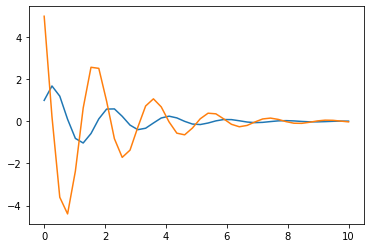

In [26]:
m = 2
g = 9.81
L = 2
xi = 3

T = xi/m
alpha =(g*T**2)/L

t = np.linspace(0,10,40)
y_0 = [1,5]
y = odeint(F,y_0,t)
plt.plot(t,y[:,0])
plt.plot(t,y[:,1])

The system is underdamped based on the zeta value provided. Changing the zeta value can result in a different dampening. 

## (c)  Phase portrait

Make a phase portrait of the system, as in Problem 11.5, but for values of $g/L$ and $\zeta/m$ that corresond to the condition you identified in part (b).

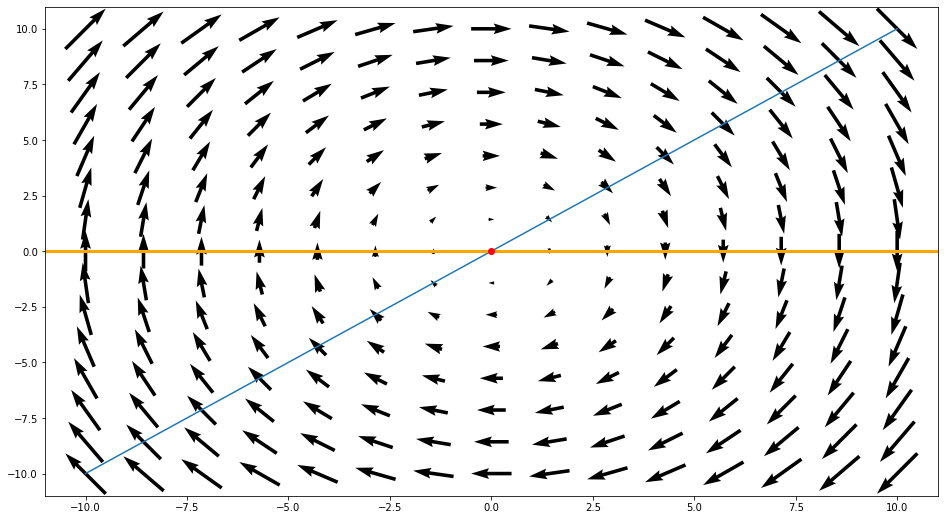

In [48]:
t = np.linspace(-10,10,15)
y0 = [1,5]
y = odeint(F,y0,t)

x = np.linspace(-10,10, 15)
y = np.linspace(-10,10, 15)
X, Y = np.meshgrid(x,y)
vX = Y
vY = -X


figure = plt.figure(figsize=(16,9))
plt.plot(t,y)
plt.quiver(X, Y, vX, vY, pivot='mid')
plt.axhline(y=0, color='orange', lw=3)
plt.plot(0,0, 'or', ms=6)

## BONUS

Better still, make three different phase portraits illustrating all three types of behavior:

- Underdamped
- Critically damped
- Overdamped

Neatness counts.  Make your plots as nice as possible.